# Лабораторная работа 1

1) Классификация данных методом k ближайших соседей ( kNN)

2) Классификация данных методом опорных векторов (SVM)

3) Построение softmax-классификатора

Вариант 1: задания 1 и 2 на наборе данных CIFAR-10

Вариант 2: задания 1 и 2 на наборе данных MNIST

Вариант 3: задания 1 и 3 на наборе данных CIFAR-10

Вариант 4: задания 1 и 3 на наборе данных MNIST

Лабораторные работы можно выполнять с использованием сервиса Google Colaboratory (https://medium.com/deep-learning-turkey/google-colab-free-gpu-tutorial-e113627b9f5d) или на локальном компьютере.

## 1. Классификация данных методом k ближайших соседей ( kNN)

In [2]:
import random
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')
import sys
sys.path.insert(0,'/content/drive/MyDrive/Colab/neuro')
from dataut import load_CIFAR10

%cd /content/drive/MyDrive/Colab/neuro


%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0)
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

%load_ext autoreload
%autoreload 2

Mounted at /content/drive
/content/drive/MyDrive/Colab/neuro


1.1 Скачайте данные в соответсвии с заданием.

CIFAR-10 по ссылке https://www.cs.toronto.edu/~kriz/cifar.html
или используйте  команду !bash get_datasets.sh (google colab, local ubuntu)

MNIST
sklearn.datasets import load_digits
digits = load_digits()

In [3]:
!bash scripts/datasets/get_datasets.sh
from sklearn.datasets import load_digits
digits = load_digits()

--2024-04-27 16:03:36--  http://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz
Resolving www.cs.toronto.edu (www.cs.toronto.edu)... 128.100.3.30
Connecting to www.cs.toronto.edu (www.cs.toronto.edu)|128.100.3.30|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 170498071 (163M) [application/x-gzip]
Saving to: ‘cifar-10-python.tar.gz’

cifar-10-python.tar 100%[===================>] 162.60M  45.1MB/s    in 3.9s    

2024-04-27 16:03:40 (42.1 MB/s) - ‘cifar-10-python.tar.gz’ saved [170498071/170498071]

cifar-10-batches-py/
cifar-10-batches-py/data_batch_4
cifar-10-batches-py/readme.html
cifar-10-batches-py/test_batch
cifar-10-batches-py/data_batch_3
cifar-10-batches-py/batches.meta
cifar-10-batches-py/data_batch_2
cifar-10-batches-py/data_batch_5
cifar-10-batches-py/data_batch_1


In [4]:
cifar10_dir = 'scripts/datasets/cifar-10-batches-py'

try:
   del X_train, y_train
   del X_test, y_test
   print('Clear previously loaded data.')
except:
   pass

X_train, y_train, X_test, y_test = load_CIFAR10(cifar10_dir)

print('Training data shape: ', X_train.shape)
print('Training labels shape: ', y_train.shape)
print('Test data shape: ', X_test.shape)
print('Test labels shape: ', y_test.shape)

Training data shape:  (50000, 32, 32, 3)
Training labels shape:  (50000,)
Test data shape:  (10000, 32, 32, 3)
Test labels shape:  (10000,)


1.2 Выведите несколько примеров изображений из обучающей выборки для каждого класса.



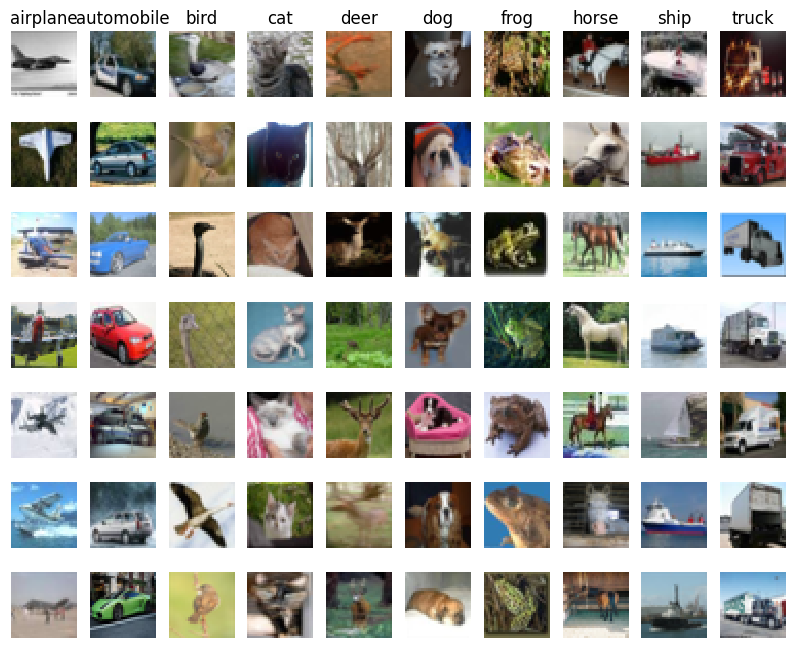

In [5]:
labels = ["airplane","automobile", "bird", "cat", "deer","dog", "frog", "horse", "ship", "truck"]
num_labels = len(labels)
samples_per_label = 7
for y, cls in enumerate(labels):
    idxs = np.flatnonzero(y_train == y)
    idxs = np.random.choice(idxs, samples_per_label, replace=False)
    for i, idx in enumerate(idxs):
        plt_idx = i * num_labels + y + 1
        plt.subplot(samples_per_label, num_labels, plt_idx)
        plt.imshow(X_train[idx].astype('uint8'))
        plt.axis('off')
        if i == 0:
            plt.title(cls)
plt.show()

1.3 Разделите данные на обучающу и тестовую выборки (X_train, y_train, X_test, y_test). Преобразуйте каждое изображение в одномерный массив.

In [6]:
train = 6000
mask = list(range(train))
X_train = X_train[mask]
y_train = y_train[mask]

test = 600
mask = list(range(test))
X_test = X_test[mask]
y_test = y_test[mask]

X_train = np.reshape(X_train, (X_train.shape[0], -1))
X_test = np.reshape(X_test, (X_test.shape[0], -1))
print(X_train.shape, X_test.shape)

(6000, 3072) (600, 3072)


1.4 Напишите реализацию классификатора в скрипте /classifiers/k_nearest_neighbor.py и обучите его на сформированной выборке.

In [7]:
from k_nearest_neighbor import KNearestNeighbor

classifier = KNearestNeighbor()
classifier.train(X_train, y_train)

1.5 Выполните классификацию на тестовой выборке

In [8]:
dists = classifier.compute_distances_two_loops(X_test)
print (dists.shape)

(600, 6000)


1.6 Визуализируйте матрицу расстояний для каждого изображения из тестовой выборки до изображений из обучающей выборки.


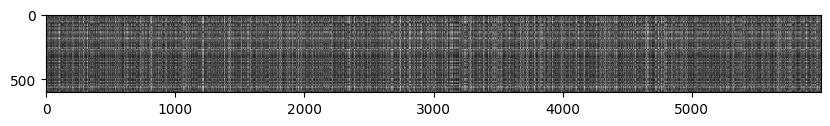

In [9]:
plt.imshow(dists, interpolation='none')
plt.show()


1.7 Посчитайте долю правильно классифицированных изображений из тестовой выборки.


In [18]:
y_test_pred = classifier.predict_labels(dists, k=1)

# Compute and print the fraction of correctly predicted examples
num_correct = np.sum(y_test_pred == y_test)
print ('доля правильно классифицированных ответов: %d из %d' % (np.sum(y_test_pred == y_test), test))
print ('Точность: %f' % (float(num_correct) / test))

доля правильно классифицированных ответов: 174 из 600
Точность: 0.290000


1.8 Постройте график зависимости доли правильно классифицированных изображений от числа соседей, используемых при классификации.

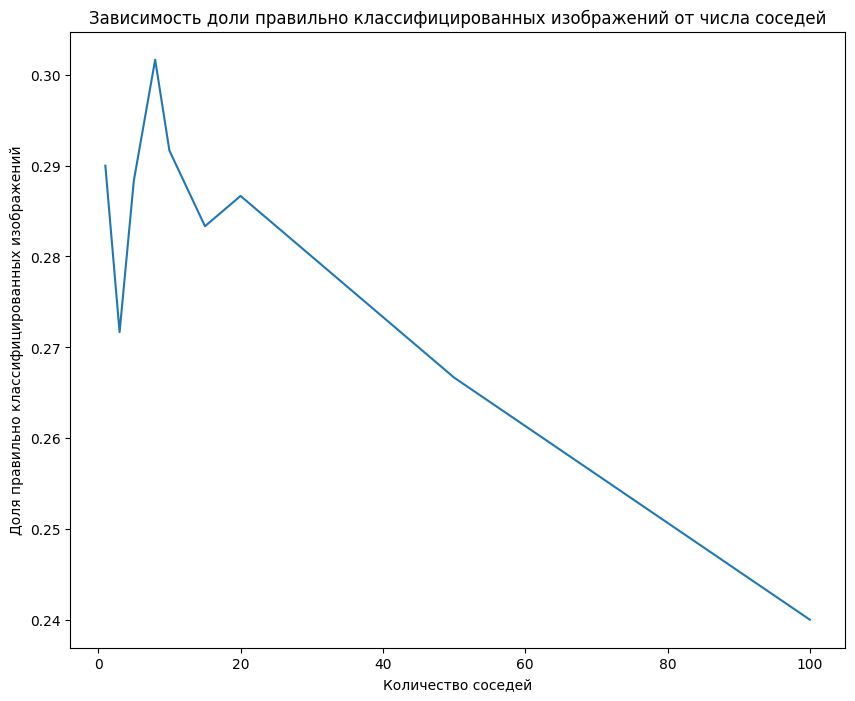

In [32]:
num_folds = 5
k_choices = [1, 3, 5, 8, 10, 12, 15, 20, 50, 100]
accuracies = []
for n in range(len(k_choices)):
  y_test_temp = classifier.predict_labels(dists, k_choices[n])
  accuracies.append(float(np.sum(y_test_temp == y_test))/test)

plt.plot( k_choices,accuracies)
plt.ylabel("Доля правильно классифицированных изображений")
plt.xlabel("Количество соседей")
plt.title("Зависимость доли правильно классифицированных изображений от числа соседей")
plt.show()


На основе этого графика можно сделать вывод, что лучшее количество соседей 8

1.9 Выберите лучшее значение параметра k на основе кросс-валидации.


In [33]:
X_train_folds = []
y_train_folds = []
X_train_folds = np.array(np.array_split(X_train, num_folds))
y_train_folds = np.array(np.array_split(y_train, num_folds))
k_to_accuracies = {}
for k in k_choices:
    for i in range(num_folds):
        labels = [x for x in range(num_folds) if x != i]
        X_train_temp = np.concatenate(X_train_folds[labels])
        y_train_temp = np.concatenate(y_train_folds[labels])
        classifier = KNearestNeighbor()
        classifier.train(X_train_temp, y_train_temp)
        y_pred = classifier.predict(X_train_folds[i], k)
        num_correct = np.sum(y_pred == y_train_folds[i])
        accuracy = float(num_correct) / 1000
        k_to_accuracies.setdefault(k, []).append(accuracy)
for k in sorted(k_to_accuracies):
    for accuracy in k_to_accuracies[k]:
        print('k = %d, accuracy = %f' % (k, accuracy))

k = 1, accuracy = 0.308000
k = 1, accuracy = 0.313000
k = 1, accuracy = 0.318000
k = 1, accuracy = 0.337000
k = 1, accuracy = 0.327000
k = 3, accuracy = 0.307000
k = 3, accuracy = 0.301000
k = 3, accuracy = 0.329000
k = 3, accuracy = 0.310000
k = 3, accuracy = 0.296000
k = 5, accuracy = 0.307000
k = 5, accuracy = 0.317000
k = 5, accuracy = 0.352000
k = 5, accuracy = 0.324000
k = 5, accuracy = 0.315000
k = 8, accuracy = 0.315000
k = 8, accuracy = 0.344000
k = 8, accuracy = 0.350000
k = 8, accuracy = 0.329000
k = 8, accuracy = 0.329000
k = 10, accuracy = 0.316000
k = 10, accuracy = 0.346000
k = 10, accuracy = 0.347000
k = 10, accuracy = 0.325000
k = 10, accuracy = 0.329000
k = 12, accuracy = 0.315000
k = 12, accuracy = 0.355000
k = 12, accuracy = 0.361000
k = 12, accuracy = 0.318000
k = 12, accuracy = 0.331000
k = 15, accuracy = 0.303000
k = 15, accuracy = 0.353000
k = 15, accuracy = 0.345000
k = 15, accuracy = 0.325000
k = 15, accuracy = 0.327000
k = 20, accuracy = 0.318000
k = 20, accu

Для наглядности построим график зависимости точности классификации на основе кросс-валидации. На его основании основании можно сделать вывод, что лучшее число соседей 12.

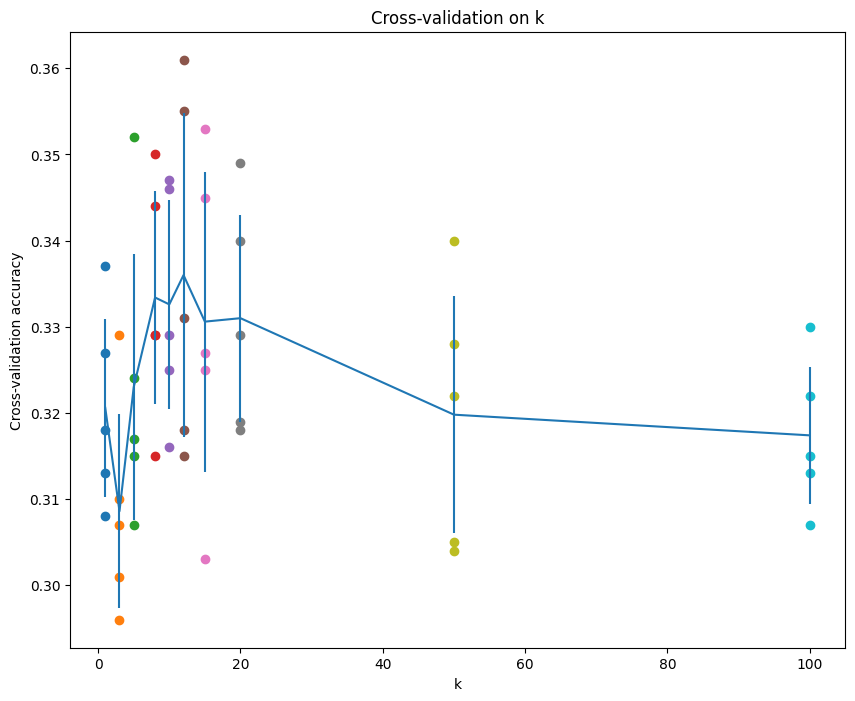

In [34]:
for k in k_choices:
    accuracies = k_to_accuracies[k]
    plt.scatter([k] * len(accuracies), accuracies)
accuracies_mean = np.array([np.mean(v) for k,v in sorted(k_to_accuracies.items())])
accuracies_std = np.array([np.std(v) for k,v in sorted(k_to_accuracies.items())])
plt.errorbar(k_choices, accuracies_mean, yerr=accuracies_std)
plt.title('Cross-validation on k')
plt.xlabel('k')
plt.ylabel('Cross-validation accuracy')
plt.show()


1.10 Переобучите и протестируйте классификатор с использованием выбранного значения k.



In [35]:
best_k = 12

classifier = KNearestNeighbor()
classifier.train(X_train, y_train)
y_test_pred = classifier.predict(X_test, k=best_k)

# Compute and display the accuracy
num_correct = np.sum(y_test_pred == y_test)
accuracy = float(num_correct) / test
print('Got %d / %d correct => accuracy: %f' % (num_correct, test, accuracy))

Got 173 / 600 correct => accuracy: 0.288333


1.11 Сделайте выводы по результатам 1 части задания.

###Выводы
Самая высокая точность, которая была достигнута составляет 0.361 при количестве соседей 12, что на порядок выше, чем при иных количествах соседей, самый низкий результат был при 3 соседях. при увеличении количества соседей прослеживается понижение точности, при количестве соседей более 20 результаты становятся более приближенными к определенному числу, средняя точность при 100 соседях не намного меньше, чем при 50, из чего можно сделать вывод что число соседей более 30 избыточно. Так же результаты первого и второго графика не совпадают, так как во 2 случае мы использовали кросс-валидацию, что дает нам более широкую картину.

## 2.  Классификация данных методом опорных векторов (SVM)

2.1 Разделите данные на обучающую, тестовую и валидационную выборки. Преобразуйте каждое изображение в одномерный массив. Выведите размеры выборок.

In [44]:
try:
   del X_train, y_train
   del X_test, y_test
   print('Clear previously loaded data.')
except:
   pass

X_train, y_train, X_test, y_test = load_CIFAR10(cifar10_dir)

print('Training data shape: ', X_train.shape)
print('Training labels shape: ', y_train.shape)
print('Test data shape: ', X_test.shape)
print('Test labels shape: ', y_test.shape)
num_training = 49000
num_validation = 1000
num_test = 1000
num_dev = 500
mask = range(num_training, num_training + num_validation)
X_val = X_train[mask]
y_val = y_train[mask]
mask = range(num_training)
X_train = X_train[mask]
y_train = y_train[mask]
mask = np.random.choice(num_training, num_dev, replace=False)
X_dev = X_train[mask]
y_dev = y_train[mask]
mask = range(num_test)
X_test = X_test[mask]
y_test = y_test[mask]

print('Train data shape: ', X_train.shape)
print('Train labels shape: ', y_train.shape)
print('Validation data shape: ', X_val.shape)
print('Validation labels shape: ', y_val.shape)
print('Test data shape: ', X_test.shape)
print('Test labels shape: ', y_test.shape)
X_train = np.reshape(X_train, (X_train.shape[0], -1))
X_val = np.reshape(X_val, (X_val.shape[0], -1))
X_test = np.reshape(X_test, (X_test.shape[0], -1))
X_dev = np.reshape(X_dev, (X_dev.shape[0], -1))

print('Training data shape: ', X_train.shape)
print('Validation data shape: ', X_val.shape)
print('Test data shape: ', X_test.shape)
print('dev data shape: ', X_dev.shape)

Clear previously loaded data.
Training data shape:  (50000, 32, 32, 3)
Training labels shape:  (50000,)
Test data shape:  (10000, 32, 32, 3)
Test labels shape:  (10000,)
Train data shape:  (49000, 32, 32, 3)
Train labels shape:  (49000,)
Validation data shape:  (1000, 32, 32, 3)
Validation labels shape:  (1000,)
Test data shape:  (1000, 32, 32, 3)
Test labels shape:  (1000,)
Training data shape:  (49000, 3072)
Validation data shape:  (1000, 3072)
Test data shape:  (1000, 3072)
dev data shape:  (500, 3072)


2.2 Проведите предварительную обработку данных, путем вычитания среднего изображения, рассчитанного  по обучающей выборке.

2.3 Чтобы далее не учитывать смещение (свободный член b), добавьте дополнитульную размерность к массиву дынных и заполните ее 1.

[130.64189796 135.98173469 132.47391837 130.05569388 135.34804082
 131.75402041 130.96055102 136.14328571 132.47636735 131.48467347]


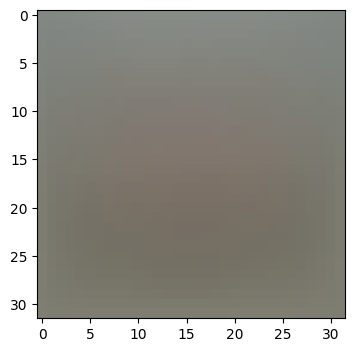

(49000, 3073) (1000, 3073) (1000, 3073) (500, 3073)


In [45]:
mean_image = np.mean(X_train, axis=0)
print(mean_image[:10])
plt.figure(figsize=(4,4))
plt.imshow(mean_image.reshape((32,32,3)).astype('uint8'))
plt.show()


X_train -= mean_image
X_val -= mean_image
X_test -= mean_image
X_dev -= mean_image



X_train = np.hstack([X_train, np.ones((X_train.shape[0], 1))])
X_val = np.hstack([X_val, np.ones((X_val.shape[0], 1))])
X_test = np.hstack([X_test, np.ones((X_test.shape[0], 1))])
X_dev = np.hstack([X_dev, np.ones((X_dev.shape[0], 1))])

print (X_train.shape, X_val.shape, X_test.shape, X_dev.shape)

2.4 Реализуйте loss-функции в scripts/classifiers/linear_svm.py



In [46]:
from linear_svm import svm_loss_naive
import time


W = np.random.randn(3073, 10) * 0.0001

loss, grad = svm_loss_naive(W, X_dev, y_dev, 0.000005)
print('loss: %f' % (loss, ))

loss: 9.045427



2.5 Убедитесь, что вы верно реализовали расчет градиента, сравнив с реализацией численными методами (код приведен ниже).

In [47]:

loss, grad = svm_loss_naive(W, X_dev, y_dev, 0.0)

from gradient_check import grad_check_sparse
f = lambda w: svm_loss_naive(w, X_dev, y_dev, 0.0)[0]
grad_numerical = grad_check_sparse(f, W, grad)


loss, grad = svm_loss_naive(W, X_dev, y_dev, 5e1)
f = lambda w: svm_loss_naive(w, X_dev, y_dev, 5e1)[0]
grad_numerical = grad_check_sparse(f, W, grad)

numerical: -10.276411 analytic: -10.276411, relative error: 5.331226e-11
numerical: 13.056248 analytic: 13.056248, relative error: 9.721954e-12
numerical: -15.612748 analytic: -15.612748, relative error: 3.122237e-11
numerical: -18.191657 analytic: -18.191657, relative error: 1.084407e-11
numerical: 0.199263 analytic: 0.199263, relative error: 2.036241e-10
numerical: -7.198660 analytic: -7.198660, relative error: 2.707209e-11
numerical: -7.564541 analytic: -7.564541, relative error: 1.227868e-11
numerical: -16.428534 analytic: -16.428534, relative error: 1.189389e-13
numerical: 2.718657 analytic: 2.718657, relative error: 3.861263e-11
numerical: 7.537565 analytic: 7.537565, relative error: 3.401780e-11
numerical: 5.278029 analytic: 5.276256, relative error: 1.679413e-04
numerical: -11.854975 analytic: -11.860843, relative error: 2.474321e-04
numerical: 16.357838 analytic: 16.346353, relative error: 3.511770e-04
numerical: -18.032760 analytic: -18.058789, relative error: 7.212032e-04
nu

2.6 Сравните svm_loss_naive и svm_loss_vectorized реализации

In [49]:
tic = time.time()
_, grad_naive = svm_loss_naive(W, X_dev, y_dev, 0.000005)
toc = time.time()
print('Naive loss and gradient: computed in %fs' % (toc - tic))

from linear_svm import svm_loss_vectorized
tic = time.time()
_, grad_vectorized = svm_loss_vectorized(W, X_dev, y_dev, 0.000005)
toc = time.time()
print('Vectorized loss and gradient: computed in %fs' % (toc - tic))

difference = np.linalg.norm(grad_naive - grad_vectorized, ord='fro')
print('difference: %f' % difference)

Naive loss and gradient: computed in 0.351538s
Vectorized loss and gradient: computed in 0.050928s
difference: 0.000000


2.7 Реализуйте стохастический градиентный спуск в /classifiers/linear_classifier.py . Реализуйте методы train() и predict() и запустите следующий код

In [58]:
from linear_classifier import LinearSVM
svm = LinearSVM()
tic = time.time()
loss_hist = svm.train(X_train, y_train, learning_rate=1e-7, reg=2.5e4,
                      num_iters=1500, verbose=True)
toc = time.time()
print('That took %fs' % (toc - tic))

iteration 0 / 1500: loss 409.569619
iteration 100 / 1500: loss 241.092561
iteration 200 / 1500: loss 146.400227
iteration 300 / 1500: loss 89.975202
iteration 400 / 1500: loss 56.489593
iteration 500 / 1500: loss 36.197227
iteration 600 / 1500: loss 23.812915
iteration 700 / 1500: loss 16.357557
iteration 800 / 1500: loss 12.202886
iteration 900 / 1500: loss 8.777348
iteration 1000 / 1500: loss 8.225996
iteration 1100 / 1500: loss 6.797414
iteration 1200 / 1500: loss 6.366275
iteration 1300 / 1500: loss 5.502666
iteration 1400 / 1500: loss 6.302586
That took 12.096456s


In [59]:
y_train_pred = svm.predict(X_train)
print('training accuracy: %f' % (np.mean(y_train == y_train_pred), ))
y_val_pred = svm.predict(X_val)
print('validation accuracy: %f' % (np.mean(y_val == y_val_pred), ))

training accuracy: 0.379571
validation accuracy: 0.382000


2.8 С помощью кросс-валидации выберите значения параметров скорости обучения и регуляризации. В кросс-валидации используйте обучающую и валидационную выборки. Оцените accuracy на тестовой выборке.

In [61]:
learning_rates = [1e-7, 5e-5]
regularization_strengths = [2.5e4, 5e4]
grid_search=[(x,y) for x in learning_rates for y in regularization_strengths]

results = {}
best_val = -1
best_svm = None

for alpha, lamda in grid_search:
    svm=LinearSVM()
    svm.train(X_train, y_train, learning_rate=alpha, reg=lamda,
             num_iters=2000)
    y_pred_train = svm.predict(X_train)
    y_pred_val = svm.predict(X_val)
    training_accuracy =  np.mean(y_pred_train==y_train)
    validation_accuracy = np.mean(y_pred_val==y_val)
    results[alpha, lamda] = (training_accuracy,
                            validation_accuracy)
    if best_val < validation_accuracy:
        best_val = validation_accuracy
        best_svm = svm

for lr, reg in sorted(results):
    train_accuracy, val_accuracy = results[(lr, reg)]
    print ('lr %e reg %e train accuracy: %f val accuracy: %f' % (lr, reg, train_accuracy, val_accuracy))

print ('best validation accuracy achieved during cross-validation: %f' % best_val)

/content/drive/MyDrive/Colab/neuro/scripts/classifiers/linear_svm.py:87: RuntimeWarning: overflow encountered in scalar multiply
  loss += 0.5*reg*np.sum(W*W)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:88: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/content/drive/MyDrive/Colab/neuro/scripts/classifiers/linear_svm.py:87: RuntimeWarning: overflow encountered in multiply
  loss += 0.5*reg*np.sum(W*W)
/content/drive/MyDrive/Colab/neuro/scripts/classifiers/linear_svm.py:83: RuntimeWarning: overflow encountered in subtract
  margins = np.maximum(0, X.dot(W)-X.dot(W)[np.arange(num_train), y].reshape(-1,1)+1)
/content/drive/MyDrive/Colab/neuro/scripts/classifiers/linear_svm.py:83: RuntimeWarning: invalid value encountered in subtract
  margins = np.maximum(0, X.dot(W)-X.dot(W)[np.arange(num_train), y].reshape(-1,1)+1)
/content/drive/MyDrive/Colab/neuro/scripts/classifiers/linear_svm.py:106: RuntimeWarning: ov

lr 1.000000e-07 reg 2.500000e+04 train accuracy: 0.381041 val accuracy: 0.394000
lr 1.000000e-07 reg 5.000000e+04 train accuracy: 0.370633 val accuracy: 0.382000
lr 5.000000e-05 reg 2.500000e+04 train accuracy: 0.152388 val accuracy: 0.131000
lr 5.000000e-05 reg 5.000000e+04 train accuracy: 0.100265 val accuracy: 0.087000
best validation accuracy achieved during cross-validation: 0.394000


2.9 Сделайте выводы по второй части задания

при использовании SVM точность выше, чем при использовании KNN, из чего можно сделать вывод о том, что он более эффективен. В последнем пункте я столкнулась с проблемой слишком больших параметров, это происходит, наверное, из-за большой скорости вычислений. В принципе результаты получены неплохие.

## 3.  Построение softmax-классификатора

3.1 Разделите данные на обучающую, тестовую и валидационную выборки. Преобразуйте каждое изображение в одномерный массив. Выведите размеры выборок.

3.2 Проведите предварительную обработку данных, путем вычитания среднего изображения, рассчитанного  по обучающей выборке.

3.3 Чтобы далее не учитывать смещение (свободный член b), добавьте дополнитульную размерность к массиву данных и заполните ее единицами.

In [ ]:
mean_image = np.mean(X_train, axis=0)
print(mean_image[:10])
plt.figure(figsize=(4,4))
plt.imshow(mean_image.reshape((32,32,3)).astype('uint8'))
plt.show()


X_train -= mean_image
X_val -= mean_image
X_test -= mean_image



X_train = np.hstack([X_train, np.ones((X_train.shape[0], 1))])
X_val = np.hstack([X_val, np.ones((X_val.shape[0], 1))])
X_test = np.hstack([X_test, np.ones((X_test.shape[0], 1))])


print(X_train.shape, X_val.shape, X_test.shape)

3.4 Реализуйте функции в classifiers/softmax.py




In [ ]:
from scripts.classifiers.softmax import softmax_loss_naive
import time

# Generate a random softmax weight matrix and use it to compute the loss.
W = np.random.randn(3073, 10) * 0.0001
loss, grad = softmax_loss_naive(W, X_dev, y_dev, 0.0)

# As a rough sanity check, our loss should be something close to -log(0.1).
print('loss: %f' % loss)
print('sanity check: %f' % (-np.log(0.1)))

3.5 Убедитесь, что вы верно реализовали расчет градиента, сравнив с реализацией численными методами (код приведен ниже).

In [ ]:
loss, grad = softmax_loss_naive(W, X_dev, y_dev, 0.0)


from scripts.gradient_check import grad_check_sparse
f = lambda w: softmax_loss_naive(w, X_dev, y_dev, 0.0)[0]
grad_numerical = grad_check_sparse(f, W, grad, 10)


loss, grad = softmax_loss_naive(W, X_dev, y_dev, 5e1)
f = lambda w: softmax_loss_naive(w, X_dev, y_dev, 5e1)[0]
grad_numerical = grad_check_sparse(f, W, grad, 10)

3.6 Сравните softmax_loss_naive и softmax_loss_vectorized реализации

In [ ]:
tic = time.time()
loss_naive, grad_naive = softmax_loss_naive(W, X_dev, y_dev, 0.000005)
toc = time.time()
print('naive loss: %e computed in %fs' % (loss_naive, toc - tic))

from scripts.classifiers.softmax import softmax_loss_vectorized
tic = time.time()
loss_vectorized, grad_vectorized = softmax_loss_vectorized(W, X_dev, y_dev, 0.000005)
toc = time.time()
print('vectorized loss: %e computed in %fs' % (loss_vectorized, toc - tic))


grad_difference = np.linalg.norm(grad_naive - grad_vectorized, ord='fro')
print('Loss difference: %f' % np.abs(loss_naive - loss_vectorized))
print('Gradient difference: %f' % grad_difference)

3.7 Реализуйте стохастический градиентный спуск в /classifiers/linear_classifier.py . Реализуйте методы train() и predict() и запустите следующий код

3.8 Обучите Softmax-классификатор и оцените accuracy на тестовой выборке.

3.9 С помощью кросс-валидации выберите значения параметров скорости обучения и регуляризации. В кросс-валидации используйте обучающую и валидационную выборки. Оцените accuracy на тестовой выборке.

In [ ]:
learning_rates = [1e-7, 5e-5]
regularization_strengths = [2.5e4, 5e4]

3.10 Сделайте выводы по третьей части задания